In [ ]:
# Import Libraries For this Notebook
import copy
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from IPython import display
from time import sleep


# Task 1: Make Video of Two Moving Boxes Intersecting

Learning Outcomes:
* Build programming foundations to creating example videos
* Understand the relation to boxes and real life video
* Learn how to playback your very own movie

You've learned how to make a bouncing sprite and you've learned how to detect objects on a static image. Let's combine both skills for a "video" that you will make.

So, why boxes again? And how does this relate to object detection? Just like in scientific research, in programming world we use foundational examples to test our understanding of concepts before moving onto more challenging examples. A box is an easy shape for a human (you) and a computer to identify. What about plankton or cells? How would a computer see those organisms? Once you master the box, you will have developed the foundations to take on biological samples. One does not start from the roof when building a house, you start from the foundation.

In this lesson, there's a question I want you to think about. When you see two humans walking and crossing each other's paths, you can tell that those are two separate people. But how does a computer see that? Does a computer see two separate people, or one? Keep that question in mind as we move onto the lesson.

## Single Static Box

So you know why we're using boxes and a question about intersecting objects, let's develop a video that has two intersecting boxes. First step, write some code to make a single static image first. Just as we've done before.

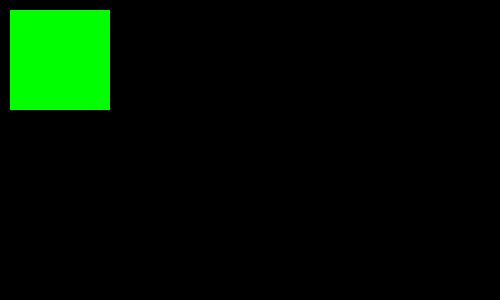

In [ ]:
# Make a Single Box First


xRez=500; yRez=300; COLOR_CHANNELS=3  # black background dimensions
x0=10; y0=10;   # location of box in background

# For changing color of rect
chanB = 0; chanG = 1; chanR = 2    # BGR Channel Index

# create black background
displayBlackIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display

# Make copy of black background image
displayIM=displayBlackIM.copy()

# Create box
rectX = 100
rectY = 100
rect = np.zeros((rectY, rectX, COLOR_CHANNELS), dtype='uint8') # black box

# Make Box White
# rect[:, :, :] = 255

#rect[:, :, chanB] = 255 # Make Box Blue
rect[:, :, chanG] = 255 # Make Box Green
#rect[:, :, chanR] = 255 # Make Box Red

# insert sprite into background at location x0, y0
displayIM[y0:y0+rectY,x0:x0+rectX,:] = rect  # paste box into black display

cv2_imshow(displayIM)

cv2.destroyAllWindows()


## Single Bouncing Box Movie
Step 1 complete. We have a static image. A video or movie is just a series of images (called "frames"), so we're going to create this movie first. then I'll show you how to create two moving boxes.

We will be using modified code the bouncing sprite animation from a previous lesson.

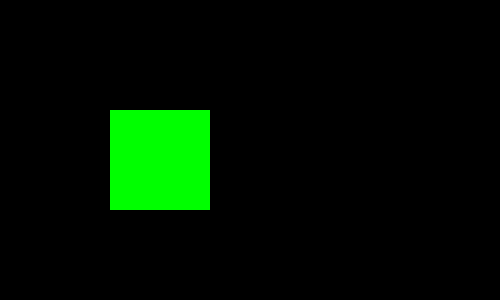

KeyboardInterrupt: ignored

In [ ]:
# Bouncing Box

CYCLES=20 # number of times to move box, aka number of frames

xRez=500; yRez=300; COLOR_CHANNELS=3  # black background dimensions

# For changing color of rectangle
chanB = 0; chanG = 1; chanR = 2    # BGR Channel Index

# starting location and movement direction
x0=10; y0=10; # ball starting position (close to top-left of background)
stepSize=20 # how many pixels to move box in each frame
# amount of pixels to move in x and y direction using stepSize
moveX=stepSize; moveY=stepSize

# Create box, using similar variables as a previous lesson.
rectX = 100 # Width of box
rectY = 100 # Height of box
rect = np.zeros((rectY, rectX, COLOR_CHANNELS), dtype='uint8') # black box
rect[:, :, chanG] = 255 # Make Box Green
# Note: play around with different valuse to get different colors.

for i in range(CYCLES):    
    # increment moveX and moveY to move the box
    x0+=moveX 
    y0+=moveY
   
    # Boundary Detection
    # Summary: If hitting the boundary, go in the opposite direction
    if x0 < 0:
        # If hitting the left boundary, make the box move right,
        # and reset x0 to zero so it doesn't leave the background
        moveX = stepSize # make the increment positive
        x0 = 0
    if y0 < 0:
        # If hitting the top boundary, make box go down
        # and reset y0 so it doesn't leave the boundary
        moveY = stepSize  # make the increment positive
        y0 = 0
    if x0 + rectX >= xRez:
        # If hitting right boundary, make box go left
        # and make sure right side of box is a little left of boundary
        # you will get a index out of bounds error
        # (Python usually doesn't include the end value)
        moveX = -stepSize  # make the increment negative
        x0 = xRez - rectX - 1
    if y0 + rectY >= yRez:
       # Same as the above, except for the bottom boundary.
        moveY = -stepSize  # make the increment negative
        y0 = yRez - rectY - 1

    # move image
    displayIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    displayIM[y0:y0+rectY,x0:x0+rectX,:] = rect  # paste rect/box image into black display
    cv2_imshow(displayIM)
    sleep(.5) # delay so we can see the image (in seconds)
    display.clear_output(wait=True)
   
print("Reached end of animation")

cv2.destroyAllWindows()


## Double Bouncing Box Movie
We now have a singular moving box movie! One step close to having intersecting boxes to see how OpenCV "sees" it.

To test if the boundary detection is working, increase the number of cycles or size of the box until you the box hit all 4 boundaries (left, top, right, bottom).

To develop your programming intuition, here are some things you can do:

* play around with different width and height values of the box
* comment the line "x0 = 0" to see what happens (make a prediction before you do to test your understanding)
* remove a "- 1" from "y0 = yRez - rectY - 1" to see what happens.
* Try to get a specific color, use a website like this to help pick a color:
https://www.rapidtables.com/web/color/RGB_Color.html . Even though it says RGB, you only have to input the correct values for the correct channel. So if R is 255, you have to make the box's red channel (chanR) to 255.

Now, let's create two bouncing boxes that intersect. Overall, you will have to duplicate certain code chunks to have individual contorl of each box. With this code, we will also save the "movie" into a list (recall that a movie is series of images)

In [ ]:
# Two Bouncing Boxes Movie

CYCLES=20 # number of times to move box

xRez=500; yRez=300; COLOR_CHANNELS=3  # black background dimensions
# Box Color Channels, as BGR Indices
chanB = 0; chanG = 1; chanR = 2    # BGR Channel Index

# Pixel Amount for box to move (idea: make it individual to each box)
stepSize=20

# Create box 1
# Note to content creators: should we use W (width) instead of x?
box1X = 100; box1Y = 100    # Box width (x) and height (y)
box1 = np.zeros((box1Y, box1X, COLOR_CHANNELS), dtype='uint8') # black box
box1[:, :, chanG] = 255 # Make Box Green

# Create box 2
box2X = 100; box2Y = 10
box2 = np.zeros((box2Y, box2X, COLOR_CHANNELS), dtype='uint8') # black box
box2[:, :, chanB] = 255 # Make Box Blue


# starting location and movement direction section
# Box 1
box1_x0=10; box1_y0=10; # box 1 starting position
box1_moveX=stepSize; box1_moveY=stepSize

# Box 2
rMargin = 100 # how much empty space to leave on the right side of the box
# box 2 starting position, opposite of box 1
box2_x0 = xRez - (box2X + rMargin)
box2_y0 = 10;
box2_moveX=-stepSize; box2_moveY=stepSize

# Note: why is box2_x0 = xRez - (box2X + rMargin)?
# Answer: Because I did not want the box to accidentally cross the boundary and cause a crash

# Initialize image_list, this will hold the "movie"
image_list = []

for i in range(CYCLES):

    # increment box1 moveX and moveY to move the box
    box1_x0+=box1_moveX 
    box1_y0+=box1_moveY

    # increment box2 moveX and moveY to move the box
    box2_x0+=box2_moveX 
    box2_y0+=box2_moveY

    # Normal Box 1 Border Movement
    if box1_x0 < 0:
        box1_moveX = stepSize # make the increment positive
        box1_x0=0
    if box1_y0<0:
        box1_moveY = stepSize  # make the increment positive
        box1_y0=0
    if box1_x0+box1X>=xRez:
        box1_moveX = -stepSize  # make the increment negative
        box1_x0=xRez-box1X-1
    if box1_y0+box1Y>=yRez:
        box1_moveY = -stepSize  # make the increment negative
        box1_y0=yRez-box1Y-1
    
    # Normal Box 2 Border Movement
    if box2_x0 < 0:
        box2_moveX = stepSize # make the increment positive
        box2_x0=0
    if box2_y0<0:
        box2_moveY = stepSize  # make the increment positive
        box2_y0=0
    if box2_x0+box2X>=xRez:
        box2_moveX = -stepSize  # make the increment negative
        box2_x0=xRez-box1X-1
    if box2_y0+box2Y>=yRez:
        box2_moveY = -stepSize  # make the increment negative
        box2_y0=yRez-box2Y-1

    # move image

    # Create Background
    displayIM=np.zeros((yRez,xRez,COLOR_CHANNELS),dtype='uint8') # black display
    
    # Add Box 1 to Black Display
    displayIM[box1_y0:box1_y0+box1Y,box1_x0:box1_x0+box1X,:] = box1  # paste sprite image into black display

    # Add Box 2 to Black Display
    displayIM[box2_y0:box2_y0+box2Y,box2_x0:box2_x0+box2X,:] = box2  # paste sprite image into black display

    # Working Display Code, commented so images are quickly saved.
    # cv2_imshow(displayIM)
    # sleep(.5) # delay so we can see the image (in seconds)
    # display.clear_output(wait=True)

    # Make a copy, very important!
    # Otherwise you end up with a movie of the same image
    frame = displayIM.copy()

    # Uncomment the next 3 lines to see if frame copying worked
    # cv2_imshow(frame)
    # sleep(.5) # delay so we can see the image (in seconds)
    # display.clear_output(wait=True)

    # Append to image_list
    image_list.append(frame)
   
print(f"len of image_list: {len(image_list)}") # Should match number of cycles
print(f"Number of cycles: {CYCLES}")

print("Reached end of animation")

cv2.destroyAllWindows()

len of image_list: 20
Number of cycles: 20
Reached end of animation


## Movie Playback, Two Methods

Notice how 20 images were saved in the image_list variable. You can uncomment cv_imshow() chunks to make sure the images are displayed correctly. However, we want to see if frames were saved correctly into the image_list variable. So I will show you two ways to do that. First, we're going to use a for loop to iterate (go step-by-step) through each image and display.

In [ ]:
# Method 1 of iterating through "movie" using for list for loop (Works!)

for image in image_list:
  cv2_imshow(image)
  sleep(.5) # delay so we can see the image (in seconds)
  display.clear_output(wait=True)

print("Reached end of animation")

cv2.destroyAllWindows()

Reached end of animation


Did it play correctly? If it did, then it worked! If it didn't, time to go back to the code chunk where the movie was first created and display the image as it loops initially.

Next is the second method of video playback. We'll have to convert the list into a numpy 4D array, then iterate using range() in the for loop.

In [ ]:
# Method 2 of iterating through numpy 4D array "movie" (Works!)

# Create numpy array from list of images
new_arr = np.array(image_list)
print(f"new_arr.shape: {new_arr.shape}")
# Notice how the first axis has the number of cycles (e.g. 20).
# Interesting coincidence. We're going to use that to loop.

# Iterate through 4D numpy array using index
for i in range(CYCLES):
  image = new_arr[i, :, :, :]

  # print(f"image shape: {image.shape}") # Make sure the image has the right dimensions.
  cv2_imshow(image)
  sleep(.5) # delay so we can see the image (in seconds)
  display.clear_output(wait=True)
  
print("Reached end of animation")

cv2.destroyAllWindows()

Reached end of animation


Wait, so why bother learning both methods? For memory reasons. In Python, lists tend to take up more memory than numpy arrays. If we're doing 20 images, it might not be a problem. But imagine doing a million images, you will eventually cause a memory leak on your computer, potentially crashing your computer, and potentially losing hours or days of work. If you have ever written a 10-page paper for months, and a sudden computer crashed caused it to disappear, then you know the feeling all too well.

However, we're using Google CoLab (cloud computing with large memory) and using a small amount of images, so it's not a problem for now. It's something to keep in mind when you're handling large datasets.

Additionally, both methods employ programming techniques you will need in your future. Method 2 uses a number (variable i), to access the image. We'll be using that in the very near future.

In summary, you learned how to create a video to two intersecting boxes and learned how to save those videos to a list of images, then learned how play back that video.

For the next section, we're going to detect the two moving boxes using OpenCV. Before, you've done it on a static image, now let's do it on a movie.

---

# Task 2: Detect Code on Two Moving Boxes Movie

Learning Outcomes:
* Run the object detection code on your own movie.
* Learn some limitations of OpenCV
* Be ready for real world video and tracking.

Excellent work so far, the work you've done so far is equivalent to a few weeks of work in an introductory programming class for computer science majors, except we provide biology examples!

Now that you created a sample video (e.g. a series of images) of intersecting boxes, let's find out how OpenCV sees it. A human, you, will see two separate boxes. What do you think OpenCV will see?

Recall that the detection pipeline looks something like this:

image -> convert to gray scale -> convert to binary image -> detect objects in binary image -> display results in original image. It sounds complicated on first viewing, but you've done this before with a static image, so let's do this on a series of images instead.


## Convert Movie to Grayscale

First, let's convert that series of images into grayscale.

In [ ]:
# Convert image list to grayscale

# Initialize empty gray_image_list
gray_image_list = []

# Use for loop to go through each image in image list
for image in image_list:
  # Convert image to grayscale
  grayIM = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # cv2_imshow(grayIM)
  # sleep(.5) # delay so we can see the image (in seconds)
  # display.clear_output(wait=True)

  # Append to gray_image_list
  gray_image_list.append(grayIM)
  

# "play" grayscale image list to see if it worked

for grayIMG in gray_image_list:
  cv2_imshow(grayIMG)
  sleep(.5) # delay so we can see the image (in seconds)
  display.clear_output(wait=True)

print("Reached end of animation")

cv2.destroyAllWindows()

Reached end of animation


## Grayscale to Binary Conversion
Was the video in grayscale? If it is, then it worked. Now let's turn all images into a series of binary images. You will have to play with the thresh value to get both boxes to show up.

Recall that thresh stands for the threshold to determine if a pixel is turned into black (0) or white (255). So if your thresh is 25 and if the pixel value is below 25, it will be turned into a zero; and if above, it is maxed to 255 (white).

Using the box example, if the box is too dark (or heading towards zero), then your thresh value needs to be low enough that the box is turned white instead.

In [ ]:
# Convert gray scale image list to binary

thresh = 25 # used to determine if a pixel is assigned 0 or 255
max_val = 255 # used to determine what maximum value anything above thresh should become

# Initialize empty binary_image_list
binary_image_list = []

for grayIMG in gray_image_list:

  ret, binaryIM = cv2.threshold(grayIMG, thresh, max_val, cv2.THRESH_BINARY) # threshold output shown as white

  # cv2_imshow(binaryIM)
  # sleep(.5) # delay so we can see the image (in seconds)
  # display.clear_output(wait=True)

  # Append to binary_image_list
  binary_image_list.append(binaryIM)

# "play" binary image list to see if it worked

for binaryIMG in binary_image_list:
  cv2_imshow(binaryIMG)
  sleep(.5) # delay so we can see the image (in seconds)
  display.clear_output(wait=True)

print("Reached end of animation")

cv2.destroyAllWindows()

Reached end of animation


## Find Contours of Binary Movie
You should get two white boxes moving around on a black background. If that didn't happen, increase or decrease the thresh variable; it has a range of 0 to 255. Try going up or down by 50 (e.g. 0, 50, 100) to see when boxes disappear or reappear. Once you find that, try smaller values to find that sweet spot; for example, let's say 50 work, try 60 or 40, and see what happens. This will help develop your intuition for thresholding.

Now that we have a binary series of images, let's detect the objects. Remember, OpenCV considers white things as objects. It's similar to squinting your eyes at a real life object until the details vanish, then all you're left with is the object itself. How many objects do you think OpenCV will detect when the boxes intersect? None, one, or two?

Object count = 2


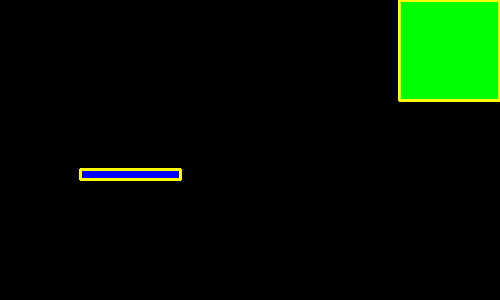

In [ ]:
# Find Contours of each binary image

# Border Constants (placed here for easier control)
# border_color = 125 # For grayscale, value between 0 and 255. 125 is gray.
border_color = (0, 255, 255) # For BGR, value between 0 and 255. Yellow
thick = 2   # thickness of rectangle lines around detected objects

# Make a deep copy of Image List since we will draw the contours on it.
# Why "deepcopy()" instead of just "copy()"? While copy works for numpy,
# copy() still only references the original list, so our code will
# actually tamper with the original image, messing up future algorithms.
# A deepcopy will make duplicates of everything in the list.
# For more details, check out this link:
#  https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/
image_list_edit = copy.deepcopy(image_list)

# Use a for loop with "i" instead, so that they match with the original image_list.
# For example, index 0 in the binary_image_list will have the corresponding
# original image at the same index. This makes adding the contour much easier.
for i in range(len(binary_image_list)):

  # Get the Binary Image from the list
  binaryIMG = binary_image_list[i]
  origIM = image_list_edit[i]

  contourList, hierarchy = cv2.findContours(binaryIMG, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # all countour points, uses more memory
  
  for objContour in contourList:
    # Create a bounding rectangle using the objContour points, store in a list called PO (Points of Object)
    PO = cv2.boundingRect(objContour)

    # Extract the values from PO
    # PO list order: x-origin, y-origin, rectangle width, and rectangle height
    # Origin is the top-left of the rectangle
    x0=PO[0]; y0=PO[1]; w=PO[2]; h=PO[3]

    # Optional: print out the results to see how different they are (uncomment the below line)
    # print(f"x0: {x0}, y0: {y0}, w: {w}, h: {h}")

    # Draw the rectangle on origIM starting at the top-left at (x0,y0) and
    # ending at the bottom right (x0+w,y0+h).
    # Use the gray border_color with a thickness of 3 pixels.
    cv2.rectangle(origIM, (x0,y0), (x0+w,y0+h), border_color, thick)
    
  # Print out how many objects OpenCV sees.
  # What happens when the boxes intersect? Will there be 0, 1, or 2 objects counted?
  print(f"Object count = {len(contourList)}")
  cv2_imshow(origIM)

  sleep(.5) # delay so we can see the image (in seconds)
  display.clear_output(wait=True)

If you guessed 1 object would be detected when the boxes intersect, then you got it right! Regardless, why is that? What happened? As you saw in the binary video, both boxes actually combined to create something new, almost like a crane made from legos or something.

And will this cause a problem when studying something like moving plankton? Yes, it will. This is an example where programming can help with automating certain tasks, but may present more programming challenges to overcome.

Additionally, it demostrates how powerful our human minds are if computers have difficulty achieving what our brains do in a fraction of a second.



## Conclusion

For this lesson, you applied what you learned for static images and applied it to a movie you created, and saw what happens when two different objects crossed paths. Later on, you will use the skills here on actual video footage of plankton moving around.